In [1]:
import pymysql
import pymysql.cursors
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Connecting to MySQL Database

In [2]:
pss = open('db_pwd.txt', 'r').read() #password to database

# Connect to the database
connection = pymysql.connect(host='127.0.0.1',
                             user='root',
                             password=pss,
                             db='city_amenities',
                             port=3306,
                             charset='utf8'
                             )
cursor = connection.cursor()

In [3]:
cursor.execute('''SHOW TABLES;''')

2

In [4]:
cursor.fetchall()

(('eateries',), ('toronto',))

#### Finding total number of eateries in Toronto

In [8]:
cursor.execute ('''SELECT COUNT(*) FROM `eateries` WHERE `eatery` IS NOT NULL''')
rest = cursor.fetchall()
print ("Total unique eateries listed in the Database: "+str(rest[0][0]))

Total unique eateries listed in the Database: 7569


In [9]:
sql = '''SELECT `eatery`, COUNT(`name`) AS Outlets  FROM `eateries` WHERE `eatery` IS NOT NULL GROUP BY `eatery` ORDER BY Outlets;'''
df = pd.read_sql_query(sql, connection)
df

,eatery,Outlets
0,ice_cream,39
1,bar,110
2,pub,351
3,cafe,1396
4,restaurant,2716
5,fast_food,2957


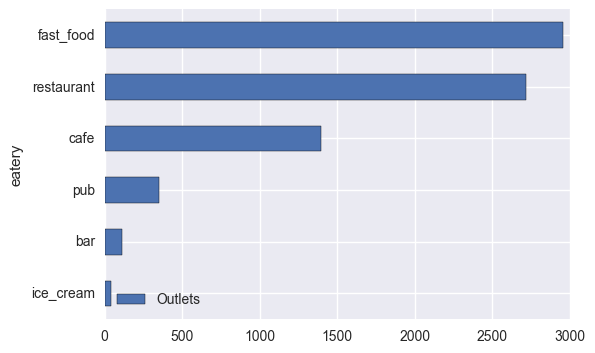

In [10]:
er = df.set_index(['eatery'])
er[['Outlets']].plot.barh(stacked=True);

#### Eateries per square KM and per 1,000 persons 

In [11]:
toronto_area = 630.21 #square KM - Wikipedia
toronto_population = 2615060 #2011 estimates- Wikipedia

In [12]:
df2 = df
df2['per_sq_km'] = (df2.Outlets/toronto_area).round(2)
df2['per_1000_persons'] = (df2.Outlets/(toronto_population/1000)).round(2)
df.set_index(['eatery'])

,Outlets,per_sq_km,per_1000_persons
eatery,,,
ice_cream,39,0.06,0.01
bar,110,0.17,0.04
pub,351,0.56,0.13
cafe,1396,2.22,0.53
restaurant,2716,4.31,1.04
fast_food,2957,4.69,1.13


#### Top Brands in each category — by numbers and %

In [13]:
sql_two = '''SELECT DISTINCT eatery FROM `eateries`   ;'''
df_two = pd.read_sql_query(sql_two, connection)
df_two.head()


,eatery
0,bar
1,cafe
2,fast_food
3,ice_cream
4,pub


In [14]:
df_two_list = df_two['eatery'].values.tolist()

In [16]:
ab = pd.DataFrame
for one_eatery in df_two_list:
    q_one = '''SELECT eatery,COUNT(`eatery`) AS eat  FROM `eateries` WHERE eatery LIKE %s;'''
    cursor.execute (q_one,one_eatery)
    eats = cursor.fetchall()
    full_value = int(eats[0][1])
    
    
    query = '''SELECT `name`, COUNT( `name`) AS Amen  FROM `eateries` WHERE `name` IS NOT NULL and `name` != '' and `eatery` like %s GROUP BY IFNULL(`name`,0) ORDER BY Amen DESC LIMIT 5;'''
    cursor.execute (query,one_eatery)
    top_ones = cursor.fetchall()
    print ("Top 5 names with maximum outlets for the eatery: "+one_eatery)
    for one in top_ones:
        am_name = one[0]
        am_value = int(one[1])
        am_pct = str("%.2f" %((am_value/full_value)*100))+"%"
        print (am_name,am_value,am_pct)
        print ("")




Top 5 names with maximum outlets for the eatery: bar
east thirty-six 1 0.91%

The Only Cafe 1 0.91%

Ontario Spring Water Sake 1 0.91%

Caven's Alley Bar 1 0.91%

SPiN 1 0.91%

Top 5 names with maximum outlets for the eatery: cafe
Tim Hortons 418 29.94%

Starbucks Coffee 245 17.55%

Second Cup 97 6.95%

Coffee Time 64 4.58%

Country Style 37 2.65%

Top 5 names with maximum outlets for the eatery: fast_food
Subway 398 13.46%

Pizza Pizza 182 6.15%

McDonald's 95 3.21%

Mr. Sub 90 3.04%

Pizza Nova 70 2.37%

Top 5 names with maximum outlets for the eatery: ice_cream
Baskin-Robbins 6 15.38%

Baskin Robbins 4 10.26%

Menchie's Frozen Yogurt 4 10.26%

Marble Slab Creamery 3 7.69%

Yogurty's 2 5.13%

Top 5 names with maximum outlets for the eatery: pub
Wild Wing 8 2.28%

Fox and Fiddle 7 1.99%

Fionn MacCool's 5 1.42%

Shoeless Joe's 3 0.85%

Bier Markt 3 0.85%

Top 5 names with maximum outlets for the eatery: restaurant
Swiss Chalet 56 2.06%

Sunset Grill 33 1.22%

Boston Pizza 25 0.92%

Eg

In [178]:
cursor.close()
connection.close()